In [1]:
import sys
sys.executable
# sys.path

'C:\\ProgramData\\Anaconda3\\python.exe'

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
# !pip install pymysql
import pymysql
from scipy import stats

In [5]:
import os
# !pip install pymysql
# import pymysql
import pandas as pd

conn = pymysql.connect(
    host="insight.cxqzkfwl6f4a.us-east-1.rds.amazonaws.com",
    port=int(3306),
    user="shoukydanindenic",
    passwd="54nuq5mi",
    db="insight",
    charset='utf8mb4')

sql = """
SELECT 	
	120 + 1 - datediff(CURDATE(), a.Create_DateTime) as "Days",
	a.Instance_UID as "Customer",
	count(*) as "Count"
FROM alert a
WHERE a.Create_DateTime >= DATE_SUB(CURDATE(), INTERVAL 119 DAY)
	AND a.Rule_Name is not NULL
	AND a.Instance_UID in ('293a66ba-6ee1-4451-81d4-50bb6e2137e1')
GROUP BY 1,2 
ORDER BY 2,1;
"""

df = pd.read_sql_query(sql, conn)


In [6]:
# df
# df.info()
# df.tail(5)
# df.sample(20)
# df.info()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 3 columns):
Days        87 non-null int64
Customer    87 non-null object
Count       87 non-null int64
dtypes: int64(2), object(1)
memory usage: 2.1+ KB


# Bulding one DF from all entries filling the missing data with 0

In [7]:
# first we will build a complete Series/DatFrame wth 120 Entries
reference_series=pd.Series(np.arange(2,122,1))
reference_df=pd.DataFrame(reference_series,columns=['Days'])
reference_df['dummy']=999
reference_df=reference_df.set_index("Days")
# reference_df


In [8]:
customer_list=df['Customer'].unique().tolist()
customer_list

['293a66ba-6ee1-4451-81d4-50bb6e2137e1']

In [9]:
number_of_costomers=len(customer_list)
number_of_costomers

1

# New Section 

---

let's check what we can do 

In [10]:
# aa=df[df['Customer']=='ff29622b-fe7e-41cd-8c3f-eed1204ba416']
# aa=aa.set_index('Days')
# aa.rename(columns={'Customer': 'todel', 'Count': 'customer'}, inplace=True)
# aa.drop(['todel'],axis=1,inplace=True)
# reference_df=reference_df.join(aa, how='outer')

for cust in customer_list:
  a=df[df['Customer']==cust]
  a=a.set_index('Days')
  a.rename(columns={'Customer': 'todel', 'Count': cust}, inplace=True)
  a.drop(['todel'],axis=1,inplace=True)
  reference_df=reference_df.join(a, how='outer')
  


In [11]:
reference_df.fillna(0,inplace=True)
referance_df=reference_df.drop(['dummy'],axis=1,inplace=True)

In [12]:
reference_df=reference_df.astype('int64')
reference_df

,293a66ba-6ee1-4451-81d4-50bb6e2137e1
Days,
2,11
3,0
4,17
5,4
6,1
7,5
8,12
9,4
10,3


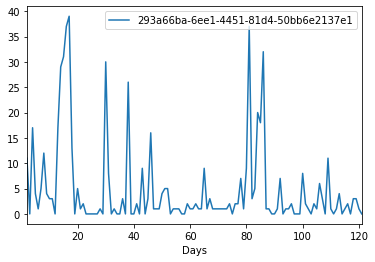

In [13]:

reference_df.plot()

In [14]:
df_sdoriginal=reference_df.copy()
df_sd=reference_df.copy()
df_sdoriginal

,293a66ba-6ee1-4451-81d4-50bb6e2137e1
Days,
2,11
3,0
4,17
5,4
6,1
7,5
8,12
9,4
10,3


# here we check running "0"

In [15]:
col_list=df_sdoriginal.columns

print("col_list {}".format(col_list))

df_sd.head()

for c in col_list:
    a=df_sd[c]
    b=[0]*len(a)
    for i in range(len(a)):
        if a.iloc[i] == 0:
            b[i] = b[i-1] + 1
        else:
            b[i] = 0
    #print ('this is the list of consecative 0 in the {} Column {}'.format(c,b) )
    #b=pd.Series(b) 
    df_sd[c+"-0s"]= pd.Series(b, index=df_sd.index)
    df_sd
df_sd.head()
col_list

col_list Index(['293a66ba-6ee1-4451-81d4-50bb6e2137e1'], dtype='object')


Index(['293a66ba-6ee1-4451-81d4-50bb6e2137e1'], dtype='object')

# Now we check the AVG and STD for 4 consequetive numbers

In [16]:
for c in col_list:
    df_sd[c+'-avg_4'] = (df_sdoriginal[c].rolling(4).mean())
    df_sd[c+'-std_4'] = (df_sdoriginal[c].rolling(4).std())

In [17]:
df_sd.head()

,293a66ba-6ee1-4451-81d4-50bb6e2137e1,293a66ba-6ee1-4451-81d4-50bb6e2137e1-0s,293a66ba-6ee1-4451-81d4-50bb6e2137e1-avg_4,293a66ba-6ee1-4451-81d4-50bb6e2137e1-std_4
Days,,,,
2,11,0,NaN,NaN
3,0,1,NaN,NaN
4,17,0,NaN,NaN
5,4,0,8.0,7.527727
6,1,0,5.5,7.852813


In [18]:
 col_list

Index(['293a66ba-6ee1-4451-81d4-50bb6e2137e1'], dtype='object')

Max 0s {} 5


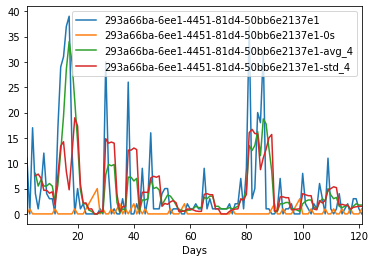

In [19]:
print("Max 0s {}",df_sd[c+"-0s"].max())

df_sd.plot()

In [20]:
# df_sd.info()
for c in col_list:
    df_sd[c+'res'] = (df_sd[c+"-0s"]>2) | (df_sd[c]<(df_sd[c+'-avg_4']-df_sd[c+'-std_4']))


In [21]:
for c in col_list:
    print ("for the ", c , "check the following",df_sd[c+'res'][df_sd[c+'res']==True])

for the  293a66ba-6ee1-4451-81d4-50bb6e2137e1 check the following Days
12     True
18     True
19     True
25     True
26     True
27     True
53     True
57     True
75     True
87     True
97     True
99     True
121    True
Name: 293a66ba-6ee1-4451-81d4-50bb6e2137e1res, dtype: bool


In [22]:
for c in col_list:
    print(df_sd[c+'res'][df_sd[c+'res']==True])

Days
12     True
18     True
19     True
25     True
26     True
27     True
53     True
57     True
75     True
87     True
97     True
99     True
121    True
Name: 293a66ba-6ee1-4451-81d4-50bb6e2137e1res, dtype: bool


In [23]:
col_list=df_sd.columns
col_res=[c for c in col_list]

col_res[-number_of_costomers:]

['293a66ba-6ee1-4451-81d4-50bb6e2137e1res']

In [24]:
%matplotlib inline
final=df_sd[col_res[-number_of_costomers:]]


In [25]:
# sns.set()

# fig, axes = plt.subplots(nrows=number_of_costomers,figsize=(30, 200))

# for j,i in enumerate(final.columns):
#   (final[i]*1).plot.bar(ax=axes[j],color='b',title= i,yticks=(0,1) );
#   axes[j].title.set_size(20);
  



# The drawing takes some time so be patient  👌🎈 

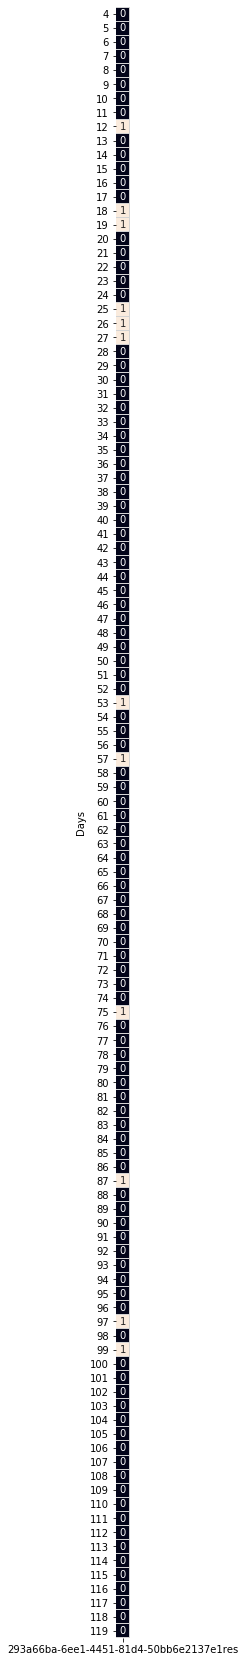

In [26]:
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(ax=ax, data=final[2:118], linecolor='lightgrey', linewidths=.01,cbar=False,annot=True,square =True) 

    

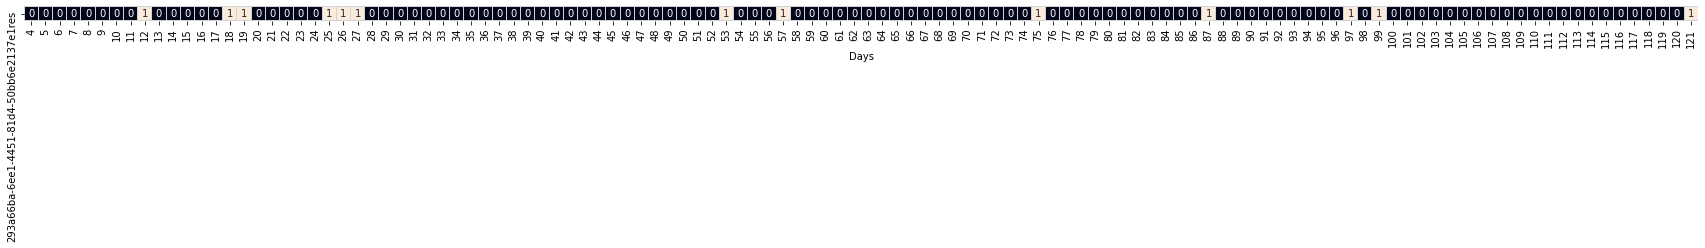

In [27]:
#final.loc[2:100]
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(ax=ax, data=final[2:120].T, linecolor='lightgrey', linewidths=.01,cbar=False,annot=True,square =True) 